In [1]:
from gurobipy import *
import numpy as np
import time

prueba = 1+2

# Problema 1

In [2]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';')
print(data)


            x         y   demanda
0      7,9744  -11,3045   147,199
1    -13,6786   -3,3825   161,327
2     -8,8032  -10,3279  172,4834
3    -15,3621    9,4144  133,8201
4     -9,0891   -7,9311  129,8221
..        ...       ...       ...
995   -6,2143    -10,86  155,4059
996  -11,7203   -2,1472  132,1921
997    6,4149    7,9825  126,1607
998    5,9054   12,7097  156,3924
999   -9,4583   -7,1544  141,3835

[1000 rows x 3 columns]


## Pre-procesamiento

In [3]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        valor = data.iloc[i,j]
        valor = valor.replace(",",".")
        data.iloc[i,j] = valor
data = data.applymap(float)

# data = data.iloc[0:100]
print(data)

           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


### Pregunta 1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [4]:
import random
import time

def centro_euclidiano(x=0, y=0, data=0, logs = True):
    
    data = data.reset_index(drop=True)
    
    x_new = x+1
    y_new = y+1

    x_i = data.iloc[:,0]
    y_i = data.iloc[:,1]
    pesos = data.iloc[:,2]
    contador = 0
    time_0 = time.time()
    while (abs(x-x_new)>0.00001 and abs(y-y_new)>0.00001):
        contador += 1
        sum = 0
        sum_new_x = 0
        sum_g_i = 0
        sum_new_y = 0
        for i in range(len(data)):
        
            distancia = ((x-float(x_i[i]))**2+(y-float(y_i[i]))**2)**(1/2)
            fx = float(pesos[i])*distancia
            sum += fx
            
            g_i= (pesos[i]/distancia)
            
            sum_new_x += (x_i[i]*g_i)
            sum_new_y += (y_i[i]*g_i)
            sum_g_i += g_i
            time_n = time.time()
            
        x, y = x_new, y_new
        x_new = sum_new_x/sum_g_i
        y_new = sum_new_y/sum_g_i
        tiempo = time_n-time_0
    if logs:
        print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new}')
        print(f'El modelo se demoró un tiempo de {tiempo} segundos y {contador} iteraciones')
    return x_new, y_new, tiempo, contador


x=random.randint(-2,2)
y=random.randint(-2,2)
posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data)

    

El modelo de localización arrojó las coordenadas x: -2.1912007225533907 y: -4.507445589916825
El modelo se demoró un tiempo de 0.42375707626342773 segundos y 38 iteraciones


### Pregunta 1.2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

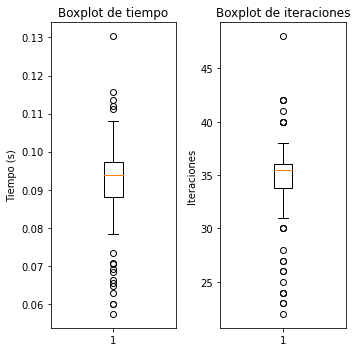

                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.700308   -4.574105    0.091375    34.400000
std      0.006257    0.000649    0.012663     4.496913
min     -3.712426   -4.575278    0.057401    22.000000
25%     -3.701278   -4.574221    0.088195    33.750000
50%     -3.700849   -4.574179    0.093931    35.500000
75%     -3.700388   -4.574129    0.097299    36.000000
max     -3.651053   -4.568935    0.130300    48.000000
           x         y    tiempo  iteraciones
0  -3.701377 -4.574231  0.091574         35.0
1  -3.709262 -4.574780  0.059973         23.0
2  -3.701134 -4.574206  0.089076         34.0
3  -3.700108 -4.574102  0.094340         36.0
4  -3.695316 -4.573590  0.078584         30.0
..       ...       ...       ...          ...
95 -3.699471 -4.574036  0.089025         34.0
96 -3.701514 -4.574244  0.086307         33.0
97 -3.700974 -4.574191  0.100815         38.0
98 -3.701720 -4.574266  0.094302         36.0

In [5]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = round(data_sample.iloc[:,0].max())
min_value_x = round(data_sample.iloc[:,0].min())
max_value_y = round(data_sample.iloc[:,1].max())
min_value_y = round(data_sample.iloc[:,1].min())

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    

fig, axes = plt.subplots(1,2,figsize=(5,5))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()

print(df_estadisticos.describe())
print(df_estadisticos)


### Pregunta 1.3
Repita la parte 1.2 pero ahora usando distinta cantidad de clientes. Tome un subconjunto de los clientes del archivo y repita el experimento con los primeros 50, 100, 500, 1000 clientes de la base. Compare en un gráfico los distintos boxplot, tanto para los tiempos de ejecución como número de iteraciones. Explique el resultado

In [6]:
# Preguntar si es que son LOS PRIMEROS o si es que hay que sacar una muestra al azar de tamaño 50, 100 o 500

data_50 = data.iloc[0:50]
data_100 = data.iloc[0:100]
data_500 = data.iloc[0:500]


###### Para los primeros 50 ######

max_value_x_50 = round(data_50.iloc[:,0].max())
min_value_x_50 = round(data_50.iloc[:,0].min())
max_value_y_50 = round(data_50.iloc[:,1].max())
min_value_y_50 = round(data_50.iloc[:,1].min())

df_estadisticos_50 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_50,max_value_x_50)
    y=random.randint(min_value_y_50,max_value_y_50)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_50, logs=False)
    df_estadisticos_50.loc[i] = [posx, posy, tiempo, iteraciones]

###### Para los primeros 100 ######

max_value_x_100 = round(data_100.iloc[:,0].max())
min_value_x_100 = round(data_100.iloc[:,0].min())
max_value_y_100 = round(data_100.iloc[:,1].max())
min_value_y_100 = round(data_100.iloc[:,1].min())

df_estadisticos_100 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_100,max_value_x_100)
    y=random.randint(min_value_y_100,max_value_y_100)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_100, logs=False)
    df_estadisticos_100.loc[i] = [posx, posy, tiempo, iteraciones]


###### Para los primeros 500 ######

max_value_x_500 = round(data_500.iloc[:,0].max())
min_value_x_500 = round(data_500.iloc[:,0].min())
max_value_y_500 = round(data_500.iloc[:,1].max())
min_value_y_500 = round(data_500.iloc[:,1].min())

df_estadisticos_500 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_500,max_value_x_500)
    y=random.randint(min_value_y_500,max_value_y_500)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_500, logs=False)
    df_estadisticos_500.loc[i] = [posx, posy, tiempo, iteraciones]
    
    
###### Para los primeros 1000 ######

max_value_x_1000 = round(data.iloc[:,0].max())
min_value_x_1000 = round(data.iloc[:,0].min())
max_value_y_1000 = round(data.iloc[:,1].max())
min_value_y_1000 = round(data.iloc[:,1].min())

df_estadisticos_1000 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data, logs=False)
    df_estadisticos_1000.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_50.describe(), df_estadisticos_100.describe(), df_estadisticos_500.describe(), df_estadisticos_1000.describe())


                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.262378   -6.729451    0.019786    37.440000
std      0.003473    0.000642    0.002680     5.009728
min     -3.290024   -6.733030    0.010526    20.000000
25%     -3.262651   -6.729482    0.018027    34.000000
50%     -3.262365   -6.729435    0.020100    38.000000
75%     -3.262169   -6.729366    0.021166    40.000000
max     -3.246610   -6.725307    0.026512    50.000000                 x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.985678   -5.045789    0.034699    33.160000
std      0.004071    0.001455    0.004754     4.520928
min     -3.996067   -5.048661    0.018768    18.000000
25%     -3.986388   -5.046074    0.033296    32.000000
50%     -3.986282   -5.046053    0.035580    34.000000
75%     -3.986189   -5.046000    0.037719    36.000000
max     -3.950915   -5.033033    0.042182    40.000000           

In [7]:
print(data_50.describe(), '\n', data_100.describe(), '\n', data_500.describe(), '\n', data.describe())

               x          y     demanda
count  50.000000  50.000000   50.000000
mean   -1.175942  -4.911742  149.108546
std    10.069588   9.525324   26.757517
min   -15.362100 -18.073700  100.810500
25%    -9.701200 -11.819600  130.482700
50%    -5.417400  -8.166550  147.822350
75%     7.643625   1.209575  166.226875
max    14.676400  15.738300  211.439200 
                 x           y     demanda
count  100.000000  100.000000  100.000000
mean    -1.171814   -3.897002  149.750156
std      9.934664    9.149004   28.210610
min    -16.366900  -18.073700   90.171200
25%     -9.625725  -10.506300  130.080475
50%     -4.593350   -6.830850  147.822350
75%      7.521700    1.278500  170.862175
max     16.912300   15.738300  211.439200 
                 x           y     demanda
count  500.000000  500.000000  500.000000
mean     0.036199   -3.627976  149.941302
std     10.775372    8.973269   29.982003
min    -21.457700  -21.626700   65.764500
25%    -10.002200  -10.579075  128.735550
50%   

### Graficamos los resultados

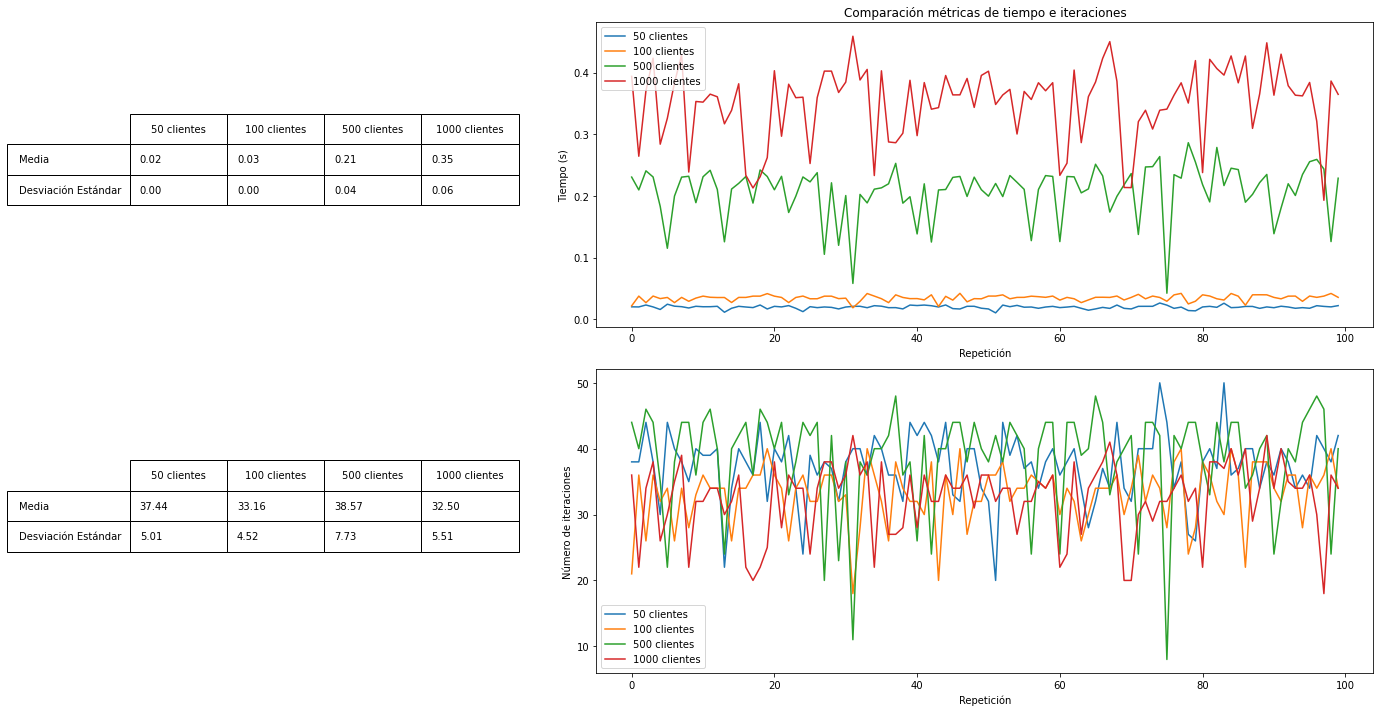

In [8]:

###### Gráfico de comparaciones de tiempos ######

metricas_tiempo = {
    'Media': [df_estadisticos_50['tiempo'].mean(), df_estadisticos_100['tiempo'].mean(), df_estadisticos_500['tiempo'].mean(), df_estadisticos_1000['tiempo'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['tiempo'].std(), df_estadisticos_100['tiempo'].std(), df_estadisticos_500['tiempo'].std(), df_estadisticos_1000['tiempo'].std()],
}


fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].plot(df_estadisticos_50['tiempo'], label='50 clientes')
axes[0].plot(df_estadisticos_100['tiempo'], label='100 clientes')
axes[0].plot(df_estadisticos_500['tiempo'], label='500 clientes')
axes[0].plot(df_estadisticos_1000['tiempo'], label='1000 clientes')

axes[0].set_title('Comparación métricas de tiempo e iteraciones')
axes[0].set_xlabel('Repetición')
axes[0].set_ylabel('Tiempo (s)')

axes[0].legend()

table_data_tiempo = [[f'{metrica:.2f}' for metrica in metricas_tiempo[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[0].table(cellText = table_data_tiempo,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])

###### Gráfico de comparaciones de iteraciones ######

metricas_iteraciones = {
    'Media': [df_estadisticos_50['iteraciones'].mean(), df_estadisticos_100['iteraciones'].mean(), df_estadisticos_500['iteraciones'].mean(), df_estadisticos_1000['iteraciones'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['iteraciones'].std(), df_estadisticos_100['iteraciones'].std(), df_estadisticos_500['iteraciones'].std(), df_estadisticos_1000['iteraciones'].std()],
}

axes[1].plot(df_estadisticos_50['iteraciones'], label='50 clientes')
axes[1].plot(df_estadisticos_100['iteraciones'], label='100 clientes')
axes[1].plot(df_estadisticos_500['iteraciones'], label='500 clientes')
axes[1].plot(df_estadisticos_1000['iteraciones'], label='1000 clientes')

axes[1].set_xlabel('Repetición')
axes[1].set_ylabel('Número de iteraciones')

axes[1].legend()

table_data_iteraciones = [[f'{metrica:.2f}' for metrica in metricas_iteraciones[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[1].table(cellText = table_data_iteraciones,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])


plt.subplots_adjust(left=0.3, bottom=0.2, hspace=0.5, wspace=0.5)
plt.tight_layout()

plt.show()


## Resultados

### Comparación en tiempo

Los resultados revelan que a medida que tenemos más datos siendo procesados por el algoritmo, va aumentando el costo en tiempo e incluso decir que podría tener un costo que va aumentando de manera casi exponencial, esto se explica ya que, como se pidió en la pregunta 1.2, hay que realizar 100 repeticiones para cada muestra requerida, lo que significa que para las muestras más pequeñas, repetir el proceso 100 veces no va a significar un impacto tan grande como lo es el repetir el proceso para las muestras más grandes, otro factor que también tiene un impacto no menor, es el hecho de que las coordenadas iniciales son puntos al azar, para este problema las coordenadas iniciales son puntos dentro de un rango, este rango corresponde a los mínimos y máximos obtenidos dentro de cada muestra, debido a este factor se podría explicar que la desviación estándar para cada muestra no es tan grande y que aumenta a medida que va creciendo el tamaño de la muestra, a medida que aumenta el número de clientes, los mínimos se van alejando cada vez más de los máximos

### Pregunta 1.4
Para el caso de 1000 clientes. Vamos a comparar el método anterior pero eligiendo un buen punto de partida, no al azar como antes. Use el método de distancia cuadrática como solución para el punto de partida. Reporte el tiempo y el número de iteraciones. ¿Por que este resultado es mejor? 


In [22]:
## Calculamos las coordenadas iniciales con el método de distancia cuadrática ##

# Como vamos a calcularlo solo para el caso de 1000 clientes, podemos calcular las coordenadas iniciales usando el df completo afuera de la función de centro euclidiano

sum_pesos = data.iloc[:,2].sum()

print(sum_pesos)

den_x = 0  
den_y = 0

for i in range(len(data)):
    den_x += (data.iloc[i,0]*data.iloc[i,2])
    den_y += (data.iloc[i,1]*data.iloc[i,2])

print(den_x, den_y)

x_inicial = den_x/sum_pesos
y_inicial = den_y/sum_pesos

print(x_inicial, y_inicial)

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    
    posx, posy, tiempo, iteraciones = centro_euclidiano(x_inicial, y_inicial, data, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]


df_estadisticos.describe()

150868.5339
-586.0032229500265 -532996.14560778
-0.0038841977700827014 -3.5328516280344124


,x,y,tiempo,iteraciones
count,1.000000e+02,1.000000e+02,100.000000,100.0
mean,-2.190571e+00,-4.507432e+00,0.390979,36.0
std,4.463264e-15,5.355917e-15,0.008572,0.0
min,-2.190571e+00,-4.507432e+00,0.381171,36.0
25%,-2.190571e+00,-4.507432e+00,0.385828,36.0
50%,-2.190571e+00,-4.507432e+00,0.388751,36.0
75%,-2.190571e+00,-4.507432e+00,0.391630,36.0
max,-2.190571e+00,-4.507432e+00,0.427647,36.0


# Problema 2

## a)

In [10]:
data_centros = pd.read_csv('cd2.csv', sep=';')
data_centros.index = range(1, len(data_centros) + 1)

for i in range(len(data_centros)):
    for j in range(len(data_centros.columns)):
        valor = data_centros.iloc[i,j]
        valor = valor.replace(",",".")
        data_centros.iloc[i,j] = valor
data_centros = data_centros.applymap(float)

# data = data.iloc[0:100]
display(data_centros)

data_clientes = data
data_clientes.index = range(1, len(data_clientes) + 1)
display(data_clientes)

,x,y
1,-4.9089,-13.2162
2,7.9829,-6.6164
3,-16.3669,-7.0845
4,-12.8194,-4.2092
5,9.4519,-11.0707
6,12.4499,-11.7062
7,16.6514,6.9430
8,2.2336,-10.4537
9,11.4180,-7.7356
10,-4.8833,-10.8051


,x,y,demanda
1,7.9744,-11.3045,147.1990
2,-13.6786,-3.3825,161.3270
3,-8.8032,-10.3279,172.4834
4,-15.3621,9.4144,133.8201
5,-9.0891,-7.9311,129.8221
...,...,...,...
996,-6.2143,-10.8600,155.4059
997,-11.7203,-2.1472,132.1921
998,6.4149,7.9825,126.1607
999,5.9054,12.7097,156.3924


In [11]:
n = len(data_clientes)
valores_N = list(range(1,n+1))

m = len(data_centros) #cantidad de instalaciones
valores_M = list(range(1,m+1))


conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]

np.random.seed(100)
matriz_c = np.zeros((n,m)) #costo transporte


for i in range(n):      # iterar sobre las filas (clientes)
    for j in range(m):  # iterar sobre las columnas (centros)
        matriz_c[i, j] = (((data_clientes.iloc[i,0]-data_centros.iloc[j,0])**2)+((data_clientes.iloc[i,1]-data_centros.iloc[j,1])**2))


costo_grande = 850
matriz_f = np.full((1, m), costo_grande) #costo instalación

matriz_d = np.zeros((1,n))
for i in range(n):
    matriz_d[0,i]=data_clientes.iloc[i, 2] #demanda clientes


demanda_grande = 50000
matriz_cap = np.full((1, m), demanda_grande)

matriz_c, matriz_f, matriz_d, matriz_cap

(array([[169.63401578,  21.97835386, 610.30728569, ..., 324.78077561,
         776.96077561, 191.38277561],
        [173.60929378, 479.67869146,  20.93176089, ...,  57.32340421,
         192.62340421, 198.54540421],
        [ 23.50784938, 295.54838546,  67.72920125, ...,   1.53984865,
         414.65584865, 184.16184865],
        ...,
        [577.61332813, 215.58650521, 746.02490024, ..., 592.81924826,
         273.51924826, 104.87124826],
        [789.1013753 , 377.81414746, 887.86570093, ..., 768.71222325,
         260.32422325, 196.41022325],
        [ 57.4424596 , 304.48490144,  47.73363997, ...,   8.39087825,
         294.56687825, 140.64487825]]),
 array([[850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850,
         850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850,
         850, 850, 850, 850, 850, 850, 850, 850, 850]]),
 array([[147.199 , 161.327 , 172.4834, 133.8201, 129.8221, 135.8759,
         137.4951, 116.0237, 176.0073, 182.5082, 211.4392, 178.

In [12]:
problema2 = Model("problema 2")

#Variables de decisión
x_ij = problema2.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij")
y_j = problema2.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j")

#Función objetivo
problema2.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices), GRB.MINIMIZE) #+ quicksum(matriz_f[0, j-1]*y_j[j] for j in conjunto_M), GRB.MINIMIZE)  #PREGUNTAR SI SE MINIMIZAN TODOS LOS COSTOS O SOLO DE TRANSPORTE

#Restricciones
problema2.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2.addConstrs(x_ij[i,j] <= y_j[j] for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= matriz_cap[0, j-1]*y_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2.addConstr(quicksum(y_j[j] for j in conjunto_M) == 4)  #se deben hacer 4 centros
problema2.addConstrs(x_ij[i,j]<=1 for (i,j) in indices)

problema2.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-08-12
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71036 rows, 35035 columns and 175070 nonzeros
Model fingerprint: 0x434231d4
Variable types: 35000 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 7.253640e+07
Presolve removed 35000 rows and 0 columns
Presolve time: 0.08s
Presolved: 36036 rows, 35035 columns, 140070 nonzeros
Variable types: 35000 continuous, 35 integer (35 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.07s

Solved with dual simplex

Root relaxation: objective 4.400097e+0

In [13]:
print(f"los costos mínimos totales son {problema2.ObjVal}")


los costos mínimos totales son 4400097.33855695


In [14]:
vars = problema2.getVars()

vars_x = vars[:-m]
variables_activas_x = [var for var in vars_x if var.x != 0]
#variables_activas_x

vars_y = vars[-m:]
variables_activas_y = [var for var in vars_y if var.x != 0]
variables_activas_y

[<gurobi.Var y_j[15] (value 1.0)>,
 <gurobi.Var y_j[31] (value 1.0)>,
 <gurobi.Var y_j[32] (value 1.0)>,
 <gurobi.Var y_j[33] (value 1.0)>]

In [15]:
centros_activos=[15, 31, 32, 33]
lista0 = []
lista1 = []
lista2 = []
lista3 = []

In [16]:
for var in variables_activas_x:
        var_name = var.varName
        #print(var_name)
        indices_str = var_name[5:-1]
        # Separamos los índices por la coma
        i, j = indices_str.split(',')
        # Convertimos los índices a enteros
        i = int(i)
        j = int(j)
    
        if j == centros_activos[0]:
            lista0.append(i)
        if j == centros_activos[1]:
            lista1.append(i)
        if j == centros_activos[2]:
            lista2.append(i)
        if j == centros_activos[3]:
            lista3.append(i)

print(f'El centro {centros_activos[0]} atiende a los clientes {lista0}')
print(f'El centro {centros_activos[1]} atiende a los clientes {lista1}')
print(f'El centro {centros_activos[2]} atiende a los clientes {lista2}')
print(f'El centro {centros_activos[3]} atiende a los clientes {lista3}')

El centro 15 atiende a los clientes [2, 4, 8, 13, 19, 26, 35, 46, 48, 50, 51, 52, 53, 57, 60, 63, 66, 68, 71, 72, 77, 78, 79, 80, 82, 90, 91, 95, 104, 110, 117, 130, 134, 140, 149, 163, 164, 169, 170, 171, 176, 180, 182, 183, 193, 200, 207, 209, 215, 224, 231, 238, 239, 240, 247, 255, 266, 271, 275, 278, 292, 294, 297, 300, 302, 304, 309, 314, 330, 331, 335, 336, 351, 354, 361, 362, 376, 379, 386, 390, 392, 393, 395, 399, 404, 405, 406, 409, 414, 415, 418, 420, 424, 435, 439, 443, 449, 457, 468, 478, 486, 489, 493, 496, 498, 503, 507, 510, 512, 523, 527, 531, 541, 542, 543, 547, 554, 559, 567, 576, 578, 582, 583, 591, 597, 598, 608, 617, 618, 621, 624, 627, 629, 632, 642, 644, 645, 647, 652, 654, 657, 663, 666, 669, 671, 673, 675, 679, 681, 683, 686, 690, 694, 697, 699, 701, 702, 711, 712, 713, 715, 721, 724, 729, 734, 736, 739, 741, 749, 750, 758, 763, 767, 769, 779, 784, 788, 791, 797, 802, 803, 813, 815, 817, 818, 825, 827, 838, 845, 848, 850, 851, 855, 856, 861, 862, 864, 867, 873,

In [17]:
indices_centros = [i - 1 for i in centros_activos]
sub_centros = data_centros.iloc[indices_centros]

indices_l0 = [i - 1 for i in lista0]
sub_l0 = data_clientes.iloc[indices_l0]

indices_l1 = [i - 1 for i in lista1]
sub_l1 = data_clientes.iloc[indices_l1]

indices_l2 = [i - 1 for i in lista2]
sub_l2 = data_clientes.iloc[indices_l2]

indices_l3 = [i - 1 for i in lista3]
sub_l3 = data_clientes.iloc[indices_l3]

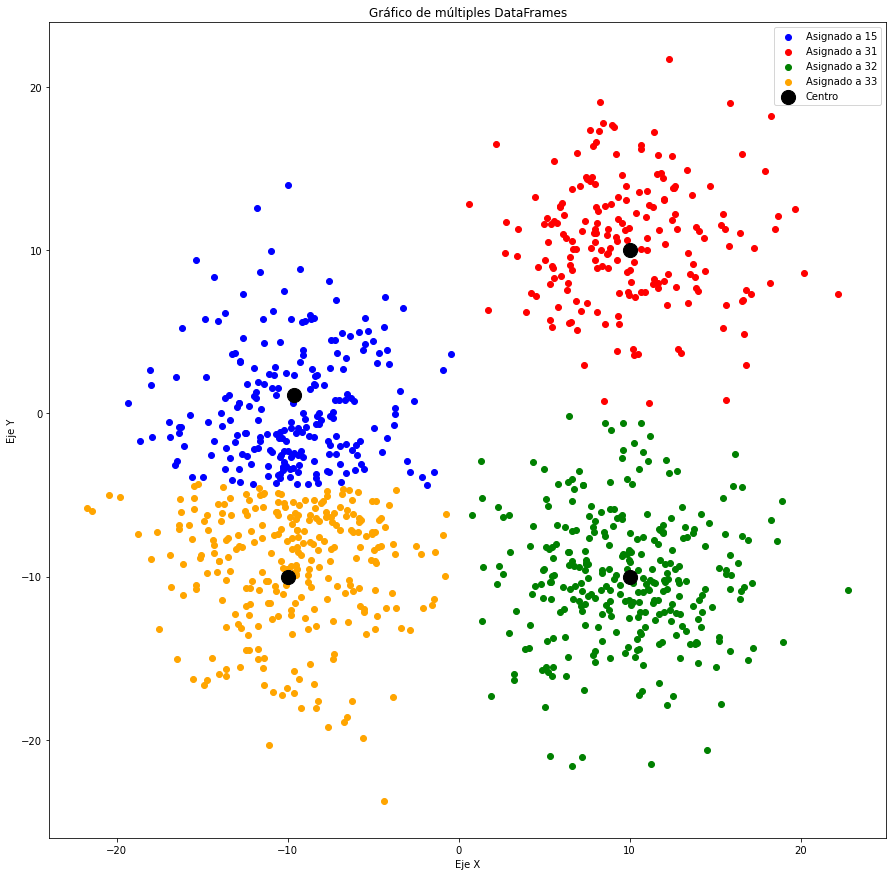

In [18]:
plt.figure(figsize=(15, 15))

# Creando el gráfico
plt.scatter(sub_l0['x'], sub_l0['y'], color='blue', label=f'Asignado a {centros_activos[0]}')
plt.scatter(sub_l1['x'], sub_l1['y'], color='red', label=f'Asignado a {centros_activos[1]}')
plt.scatter(sub_l2['x'], sub_l2['y'], color='green', label=f'Asignado a {centros_activos[2]}')
plt.scatter(sub_l3['x'], sub_l3['y'], color='orange', label=f'Asignado a {centros_activos[3]}')
plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=200, label=f'Centro')

# Personalizando el gráfico
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de múltiples DataFrames')
plt.legend()

# Mostrando el gráfico
plt.show()

## b)

$$
min  \left(\sum_{j=1}^m\ ( \sum_{i=1}^n\ C_ij * d_ij * x_ij ) + 200*p_j +450*m_j + 850*g_j  \right) \\
$$

In [42]:
problema2b = Model("problema 2b")

#Variables de decisión
x_ij = problema2b.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij") #porcentaje en el que el cliente i se atiende en el centro j
#y_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j") #1 si se construye el centro j, 0 si no
p_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "p_j") #1 si el centro j se construye y es chico, 0 si no
m_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "m_j") #1 si el centro j se construye y es mediano, 0 si no
g_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "g_j") #1 si el centro j se construye y es grande, 0 si no

#Función objetivo
problema2b.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices) + quicksum((200*p_j[j])+(450*m_j[j])+(850*g_j[j]) for j in conjunto_M), GRB.MINIMIZE)  

#Restricciones
problema2b.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2b.addConstrs(p_j[j] + m_j[j] + g_j[j] <= 1 for j in conjunto_M) #el centro puede ser o pequeño o mediano o grande (solo 1)
problema2b.addConstrs(x_ij[i,j] <= (p_j[j] + m_j[j] + g_j[j]) for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2b.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 10000*p_j[j] + 25000*m_j[j] + 50000*g_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2b.addConstrs(x_ij[i,j]<=1 for (i,j) in indices) #el porcentaje de atención es menor o igual a 1 (es un porcentaje)



{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (1, 16): <gurobi.Constr *Awaiting Model Update*>,
 (1, 17): <gurobi.Constr *Awaiting Model Update*>,
 (1, 18): <gurobi.Constr *Awaiting Model Update*>,
 (1, 19): <gurobi.Constr *Awaiting Model Update*>,
 (1, 20): <gurobi.Constr *Awaiting Model

In [43]:
problema2b.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71070 rows, 35105 columns and 245210 nonzeros
Model fingerprint: 0x8a8ca9e5
Variable types: 35000 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 35000 rows and 0 columns
Presolve time: 0.13s
Presolved: 36070 rows, 35105 columns, 210210 nonzeros
Variable types: 35000 continuous, 105 integer (105 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.01s

Solved with dual simplex

Root relaxation: objective 1.258650e+06, 87 iterations, 0.09 seconds (0.08 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl 

In [44]:
print(f"los costos mínimos totales son {problema2b.ObjVal}")

los costos mínimos totales son 1258865.7557536508


In [65]:

vars = problema2b.getVars()

vars_x = vars[:-(3*m)]
variables_activas_x = [var for var in vars_x if var.x != 0]
#display(variables_activas_x)

vars_p = vars[len(vars_x):-(2*m)]
variables_activas_p = [var for var in vars_p if var.x != 0]
#display(variables_activas_y)

vars_m = vars[(len(vars_x)+len(vars_p)):-(m)]
variables_activas_m = [var for var in vars_m if var.x != 0]

vars_g = vars[-m:]
variables_activas_g = [var for var in vars_g if var.x != 0]

variables_activas_p, variables_activas_m, variables_activas_g

([<gurobi.Var p_j[1] (value 1.0)>,
  <gurobi.Var p_j[2] (value 1.0)>,
  <gurobi.Var p_j[3] (value 1.0)>,
  <gurobi.Var p_j[4] (value 1.0)>,
  <gurobi.Var p_j[5] (value 1.0)>,
  <gurobi.Var p_j[6] (value 1.0)>,
  <gurobi.Var p_j[7] (value 1.0)>,
  <gurobi.Var p_j[8] (value 1.0)>,
  <gurobi.Var p_j[9] (value 1.0)>,
  <gurobi.Var p_j[10] (value 1.0)>,
  <gurobi.Var p_j[11] (value 1.0)>,
  <gurobi.Var p_j[12] (value 1.0)>,
  <gurobi.Var p_j[13] (value 1.0)>,
  <gurobi.Var p_j[14] (value 1.0)>,
  <gurobi.Var p_j[16] (value 1.0)>,
  <gurobi.Var p_j[17] (value 1.0)>,
  <gurobi.Var p_j[18] (value 1.0)>,
  <gurobi.Var p_j[19] (value 1.0)>,
  <gurobi.Var p_j[20] (value 1.0)>,
  <gurobi.Var p_j[21] (value 1.0)>,
  <gurobi.Var p_j[22] (value 1.0)>,
  <gurobi.Var p_j[23] (value 1.0)>,
  <gurobi.Var p_j[24] (value 1.0)>,
  <gurobi.Var p_j[25] (value 1.0)>,
  <gurobi.Var p_j[26] (value 1.0)>,
  <gurobi.Var p_j[27] (value 1.0)>,
  <gurobi.Var p_j[28] (value 1.0)>,
  <gurobi.Var p_j[29] (value 1.0)>,
 

# Problema 3

Opcion 1 modelo
Se quiere mínimizar la suma de las distancias totales hacia el centro

$$\begin{array}{rl}
\min & \sum_{i=1}^n\sum_{j=1}^m\ d_{ij}x_{ij}\\
\text{s.t.} & \\
& \sum_{i=1}^n x_{ij} = 1 \qquad \forall j \in [1:m] \\
& \sum_{j=1}^m x_{ij} \leq 1 \qquad \forall i \in [1:n] \\
& x_{ij} \in \{0,1\} \qquad \forall i \in [1:n] ,\forall j \in [m]
\end{array}$$ 


Donde $d_{ij}$ representa la estacion $i$ asignada al lugar $j$. Y $x_{ij}$ sea variable binaria que toma el valor 1 si la estacion $i$ es asignado a la ubicacion $j$ y 0 si no.


hay que ver si tiene sentido:)

$$\begin{array}{rl}
\min & \sum_{i=1}^n\ d((x,y),(a_{i},b_{i}))\\
\text{s.t.} & \\
& \sum_{i=1}^n x_{ij} = 1 \qquad \forall j \in [1:m] \\
& \sum_{j=1}^m x_{ij} \leq 1 \qquad \forall i \in [1:n] \\
& x_{ij} \in \{0,1\} \qquad \forall i \in [1:n] ,\forall j \in [m]
\end{array}$$ 

Opción 2 \
\
Método centro de gravedad (distancia euclidiana)
Se quiere minimizar la distancia entre ubicaciones en un espacio bidimensional. La distancia euclidiana entre el centro de la habitación hacia los puestos de los operadores se define como:
$$
min  \left(\sum_{i=1}^n\ d(x, y), (a_i, b_i) \right) = \sqrt{(x - a_i)^2 + (y - b_i)^2}\\
$$
Donde d representa el calculo de la distancia entre el punto objetivo (x,y) y cada uno de los puestos operadores con coordenadas (a_i,b_i)
$$
\text{s.t.}\\
2 \leq x_i \leq 10,\quad 2 \leq y_i \leq 8 \quad \forall i
$$
Ninguna ubicación puede quedar a menos de dos metros de las paredes
$$
\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2} \geq 3, \quad \forall i \neq j
$$
La distancia entre cualquiera de las estaciones debe ser al menos de 3 metros